# Summary

**Implement the artificial feature extraction and store them into a new csv dataset file.**

../dataset/Train ==> ../feature dataset/training_data.csv

../dataset/Test  ==> ../feature dataset/test_data.csv

# Package Pool

In [2]:
import matplotlib.pyplot as plt
import matplotlib.image as mpimg
import pandas as pd
import numpy as np
import os
import math
import cv2

# Function Pool

In [17]:
np.seterr(divide='ignore',invalid='ignore')

def getDstDirect(gray_img):
    # gray_img = th2
    img = cv2.GaussianBlur(gray_img,(7,7),0)
    x = cv2.Sobel(img,cv2.CV_16S,1,0)  
    y = cv2.Sobel(img,cv2.CV_16S,0,1)  
    absX = cv2.convertScaleAbs(x)   # back to uint8  
    absY = cv2.convertScaleAbs(y)    
    dst = cv2.addWeighted(absX,0.5,absY,0.5,0)
    direct = y/x
    return dst, direct

def getHist(dst, direct, size):
    hist = np.zeros(181)
    row = size[0]
    col = size[1]
    for r in range(row):
        for c in range(col):
            if dst[r][c] != 0:
                theta = int(math.degrees(math.atan(direct[r][c])))
                if theta < 0:
                    theta += 180 
                hist[theta] += 1
    hist = (hist-min(hist))/(max(hist)-min(hist))
#     hist[0] = 0
#     hist[45] = 0
#     hist[90] = 0
#     hist[135] = 0
#     hist = hist/sum(hist)
    return hist

def drawGraph(img, dst, hist):
    plt.figure(figsize=(10,5))
    plt.subplot(221); plt.imshow(img); plt.axis('off')
    plt.subplot(222); plt.imshow(dst); plt.axis('off')
    plt.subplot(2,2,(3,4)); plt.plot(hist)
    plt.show()

# Train set

In [87]:
import pandas as pd

In [88]:
train_df = pd.DataFrame(columns=['fname','image','edge','degrees_hist','label'])

In [89]:
import os

image_dir = "../dataset/Train/Clean"
fnames = [os.path.join(image_dir, fname) for fname in os.listdir(image_dir)]

In [90]:
fnames[0].split('/')[-1]
len(fnames)

155

### Clean Train

In [91]:
for f in range(len(fnames)):
    img_path = fnames[f] # path of the image
    rgb_img = mpimg.imread(img_path)
    gray_img = cv2.imread(img_path,0)
    img_fname = img_path.split('/')[-1]
    edge, direct = getDstDirect(gray_img)
    hist = getHist(edge, direct, gray_img.shape)
    train_df = train_df.append(pd.Series([img_fname,rgb_img,edge,hist.tolist(),'clean'], index=train_df.columns), ignore_index=True)
    print(f+1,' is done!')

1  is done!
2  is done!
3  is done!
4  is done!
5  is done!
6  is done!
7  is done!
8  is done!
9  is done!
10  is done!
11  is done!
12  is done!
13  is done!
14  is done!
15  is done!
16  is done!
17  is done!
18  is done!
19  is done!
20  is done!
21  is done!
22  is done!
23  is done!
24  is done!
25  is done!
26  is done!
27  is done!
28  is done!
29  is done!
30  is done!
31  is done!
32  is done!
33  is done!
34  is done!
35  is done!
36  is done!
37  is done!
38  is done!
39  is done!
40  is done!
41  is done!
42  is done!
43  is done!
44  is done!
45  is done!
46  is done!
47  is done!
48  is done!
49  is done!
50  is done!
51  is done!
52  is done!
53  is done!
54  is done!
55  is done!
56  is done!
57  is done!
58  is done!
59  is done!
60  is done!
61  is done!
62  is done!
63  is done!
64  is done!
65  is done!
66  is done!
67  is done!
68  is done!
69  is done!
70  is done!
71  is done!
72  is done!
73  is done!
74  is done!
75  is done!
76  is done!
77  is done!
78  is d

In [92]:
# df.head()
len(train_df)

155

### Messy Train

In [96]:
messy_img_train_dir = "../dataset/Train/Messy"
fnames = [os.path.join(messy_img_train_dir, fname) for fname in os.listdir(messy_img_train_dir)]

In [97]:
len(fnames)

125

In [98]:
for f in range(len(fnames)):
    img_path = fnames[f] # path of the image
    rgb_img = mpimg.imread(img_path)
    gray_img = cv2.imread(img_path,0)
    img_fname = img_path.split('/')[-1]
    edge, direct = getDstDirect(gray_img)
    hist = getHist(edge, direct, gray_img.shape)
    train_df = train_df.append(pd.Series([img_fname,rgb_img,edge,hist.tolist(),'messy'], index=train_df.columns), ignore_index=True)
    print(f+1,' is done!')

1  is done!
2  is done!
3  is done!
4  is done!
5  is done!
6  is done!
7  is done!
8  is done!
9  is done!
10  is done!
11  is done!
12  is done!
13  is done!
14  is done!
15  is done!
16  is done!
17  is done!
18  is done!
19  is done!
20  is done!
21  is done!
22  is done!
23  is done!
24  is done!
25  is done!
26  is done!
27  is done!
28  is done!
29  is done!
30  is done!
31  is done!
32  is done!
33  is done!
34  is done!
35  is done!
36  is done!
37  is done!
38  is done!
39  is done!
40  is done!
41  is done!
42  is done!
43  is done!
44  is done!
45  is done!
46  is done!
47  is done!
48  is done!
49  is done!
50  is done!
51  is done!
52  is done!
53  is done!
54  is done!
55  is done!
56  is done!
57  is done!
58  is done!
59  is done!
60  is done!
61  is done!
62  is done!
63  is done!
64  is done!
65  is done!
66  is done!
67  is done!
68  is done!
69  is done!
70  is done!
71  is done!
72  is done!
73  is done!
74  is done!
75  is done!
76  is done!
77  is done!
78  is d

In [99]:
train_df.label.value_counts()

clean    155
messy    125
Name: label, dtype: int64

In [100]:
train_df.to_csv('../feature dataset/training_data.csv',index=None)
# train_df.to_pickle('training_data.pkl')

# Test Data

In [79]:
test_df = pd.DataFrame(columns=['fname','image','edge','degrees_hist','label'])
# test_df = pd.DataFrame(columns=['fname','degrees_hist','label'])

### Clean Test

In [80]:
clean_img_test_dir = "../dataset/Test/Clean"
fnames = [os.path.join(clean_img_test_dir, fname) for fname in os.listdir(clean_img_test_dir)]


In [81]:
len(fnames)
fnames

['../dataset/Test/Clean/C156.jpeg',
 '../dataset/Test/Clean/C157.jpg',
 '../dataset/Test/Clean/C159.jpg',
 '../dataset/Test/Clean/C158.jpg',
 '../dataset/Test/Clean/C160.jpg']

In [82]:
for f in range(len(fnames)):
    img_path = fnames[f] # path of the image
    rgb_img = mpimg.imread(img_path)
    gray_img = cv2.imread(img_path,0)
    img_fname = img_path.split('/')[-1]
    edge, direct = getDstDirect(gray_img)
    hist = getHist(edge, direct, gray_img.shape)
#     test_df = test_df.append(pd.Series([img_fname,rgb_img.tolist(),edge.tolist(),hist.tolist(),'clean'], index=test_df.columns), ignore_index=True)
    test_df = test_df.append(pd.Series([img_fname,rgb_img,edge,hist.tolist(),'clean'], index=test_df.columns), ignore_index=True)
    print(f+1,' is done!')

1  is done!
2  is done!
3  is done!
4  is done!
5  is done!


### Messy Test

In [83]:
Messy_img_test_dir = "../dataset/Test/Messy"
fnames = [os.path.join(Messy_img_test_dir, fname) for fname in os.listdir(Messy_img_test_dir)]


In [84]:
len(fnames)
fnames

['../dataset/Test/Messy/M109.jpg',
 '../dataset/Test/Messy/M108.jpg',
 '../dataset/Test/Messy/M106.jpg',
 '../dataset/Test/Messy/M107.jpg',
 '../dataset/Test/Messy/M105.jpg']

In [85]:
for f in range(len(fnames)):
    img_path = fnames[f] # path of the image
    rgb_img = mpimg.imread(img_path)
    gray_img = cv2.imread(img_path,0)
    img_fname = img_path.split('/')[-1]
    edge, direct = getDstDirect(gray_img)
    hist = getHist(edge, direct, gray_img.shape)
#     test_df = test_df.append(pd.Series([img_fname,rgb_img.tolist(),edge.tolist(),hist.tolist(),'messy'], index=test_df.columns), ignore_index=True)
    test_df = test_df.append(pd.Series([img_fname,rgb_img,edge,hist.tolist(),'messy'], index=test_df.columns), ignore_index=True)
    print(f+1,' is done!')

1  is done!
2  is done!
3  is done!
4  is done!
5  is done!


In [86]:
test_df.label.value_counts()

messy    5
clean    5
Name: label, dtype: int64

In [87]:
test_df.to_csv('../feature dataset/test_data.csv',index=None)
# test_df.to_pickle('test_data.pkl')

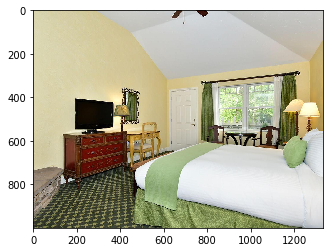

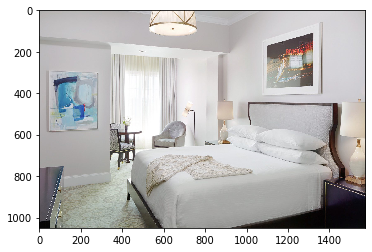

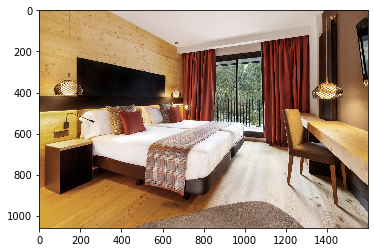

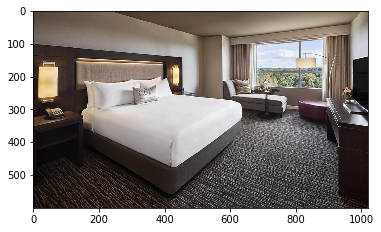

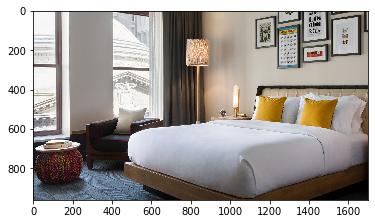

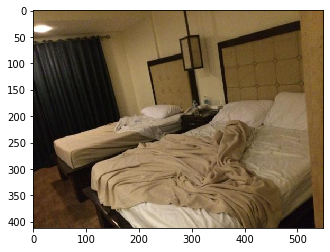

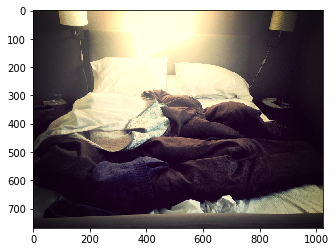

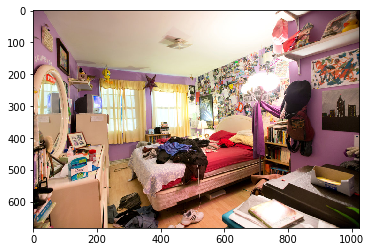

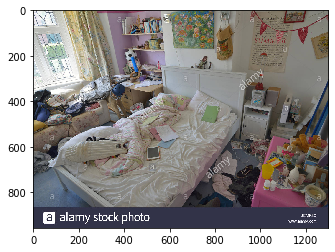

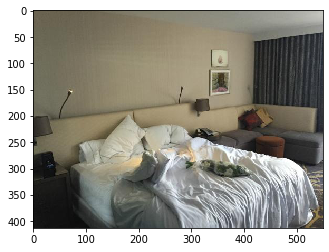

In [76]:
for img in test_df.image.values:
    plt.imshow(img)
    plt.show()

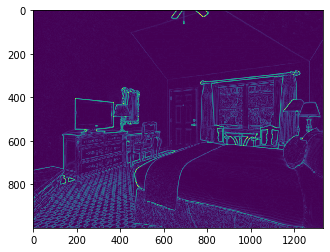

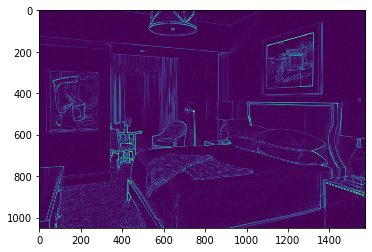

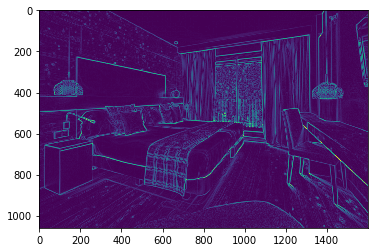

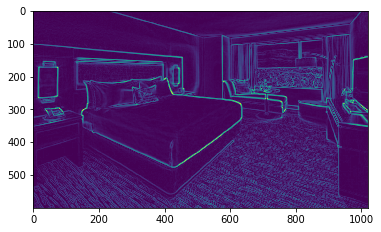

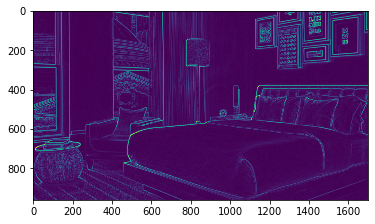

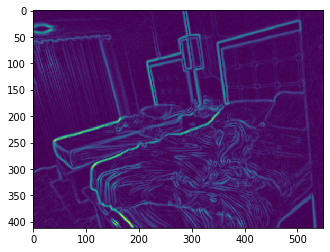

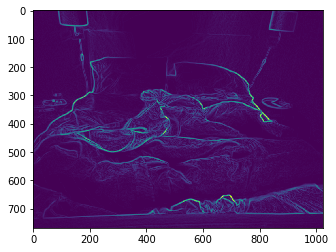

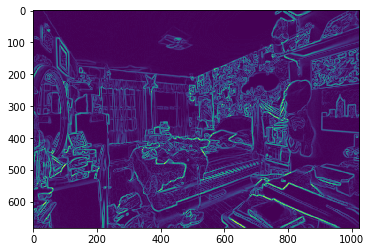

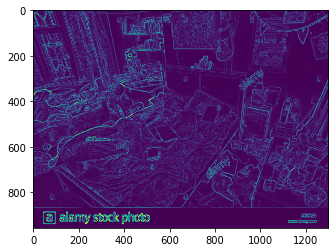

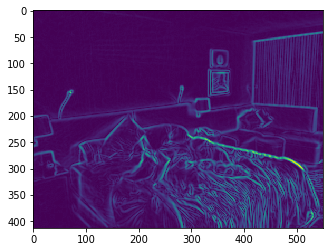

In [77]:
for img in test_df.edge.values:
    plt.imshow(img)
    plt.show()

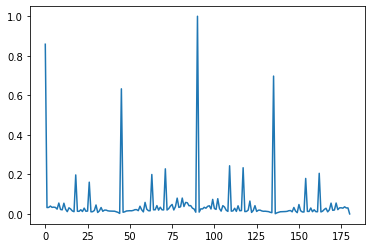

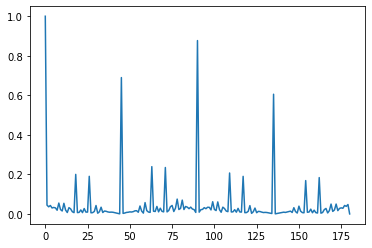

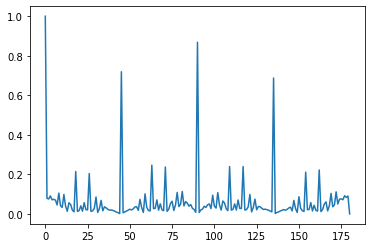

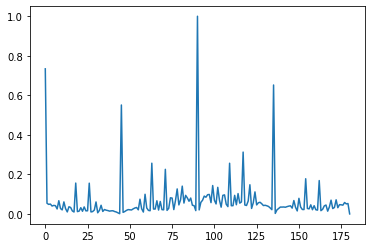

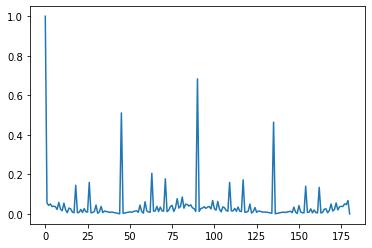

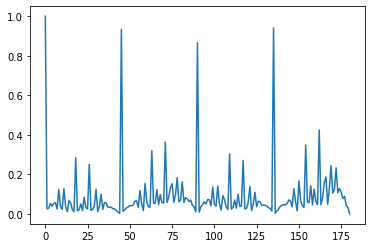

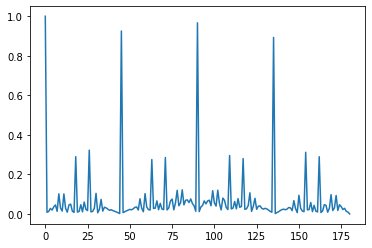

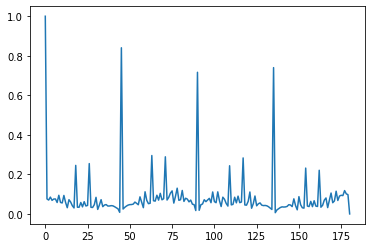

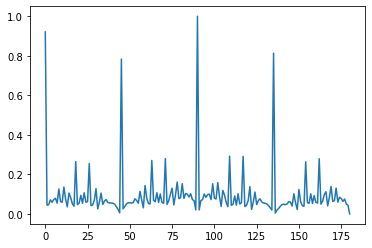

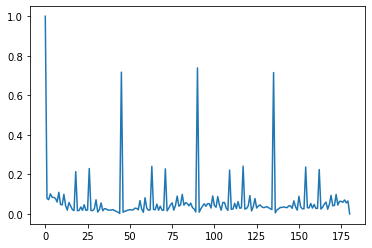

In [78]:
for hist in test_df.degrees_hist.values:
    plt.plot(hist)
    plt.show()